In [14]:
from ssapp.visualization.PCA_Visualisation import plotParameterColoredLatentSpace
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
from ssapp.Utils import FigureSaver
##Settings
%matplotlib inline
%config InlineBackend.figure_formats = ['png']
%load_ext autoreload
%autoreload 2

figSaver = FigureSaver(subfolder = 'Latent Space Plots',default_format='png')





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


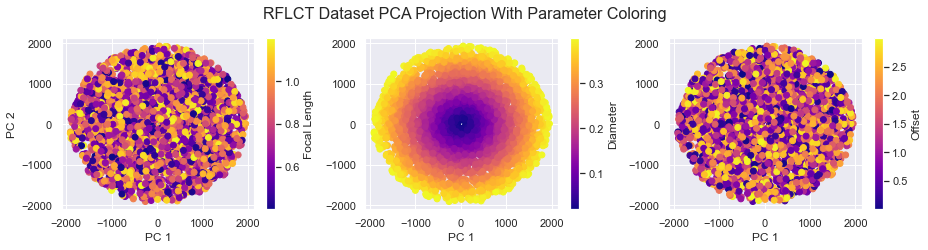

In [15]:
dataset = load_serialized_dataset('RFLCT')

plotParameterColoredLatentSpace(dataset,
                                 param_names=['Focal Length', 'Diameter','Offset' ],
                                 pca_components=(1,2),
                                 figsize = (13,3.5),
                                 title = 'RFLCT Dataset PCA Projection With Parameter Coloring')

figSaver.save('ReflectorAntennaPCA')

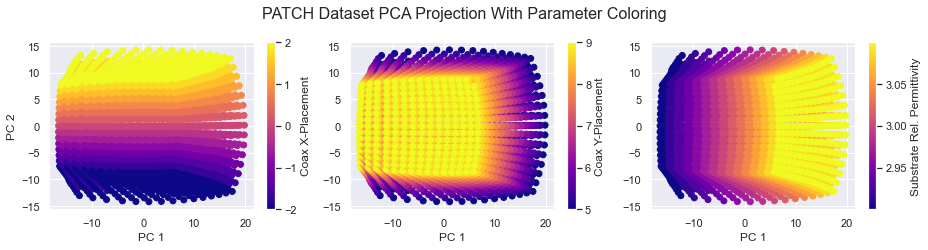

In [16]:
dataset = load_serialized_dataset('PatchAntennaDataset2')

plotParameterColoredLatentSpace(dataset,
                                 param_names=['Coax X-Placement','Coax Y-Placement','Substrate Rel. Permittivity'],
                                 pca_components=(1,2),
                                 figsize = (13,3.5),
                                 title = 'PATCH Dataset PCA Projection With Parameter Coloring')


figSaver.save('PatchAntennaPCA')

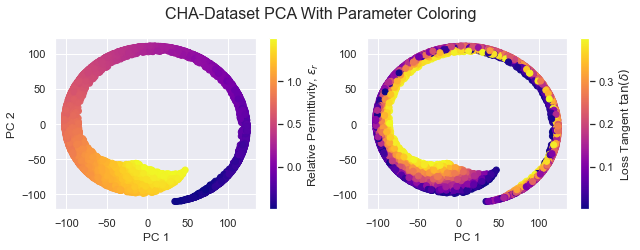

In [17]:
dataset = load_serialized_dataset('CircularHornDataset1')

plotParameterColoredLatentSpace(dataset, 
                                param_names=['Relative Permittivity, $\epsilon_r$',r'Loss Tangent $\tan(\delta)$'],
                                pca_components=(1,2),
                                title = 'CHA-Dataset PCA With Parameter Coloring',
                                figsize = (9,3.5))

figSaver.save('CircularHornDatasetPCA')

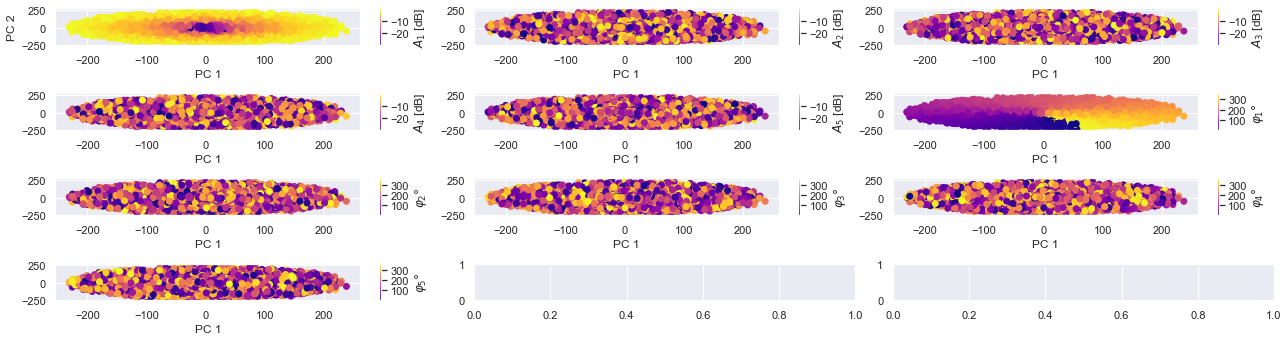

In [18]:
dataset = load_serialized_dataset('MLADataset1')

plotParameterColoredLatentSpace(dataset,
                                figsize=(18,5),
                                title = '',
                                param_names = ['$A_1$ [dB]','$A_2$ [dB]','$A_3$ [dB]','$A_4$ [dB]','$A_5$ [dB]',r'$\varphi_1 \degree$ ',r'$\varphi_2 \degree$',r'$\varphi_3 \degree$',r'$\varphi_4 \degree$',r'$\varphi_5 \degree$'],
                                layout_shape = (4,3),
                                pca_components=(1,2))

figSaver.save('MLA_PCA_1_2')

C:\Users\Niels\AppData\Local\Temp/ipykernel_30148/3104285165.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])


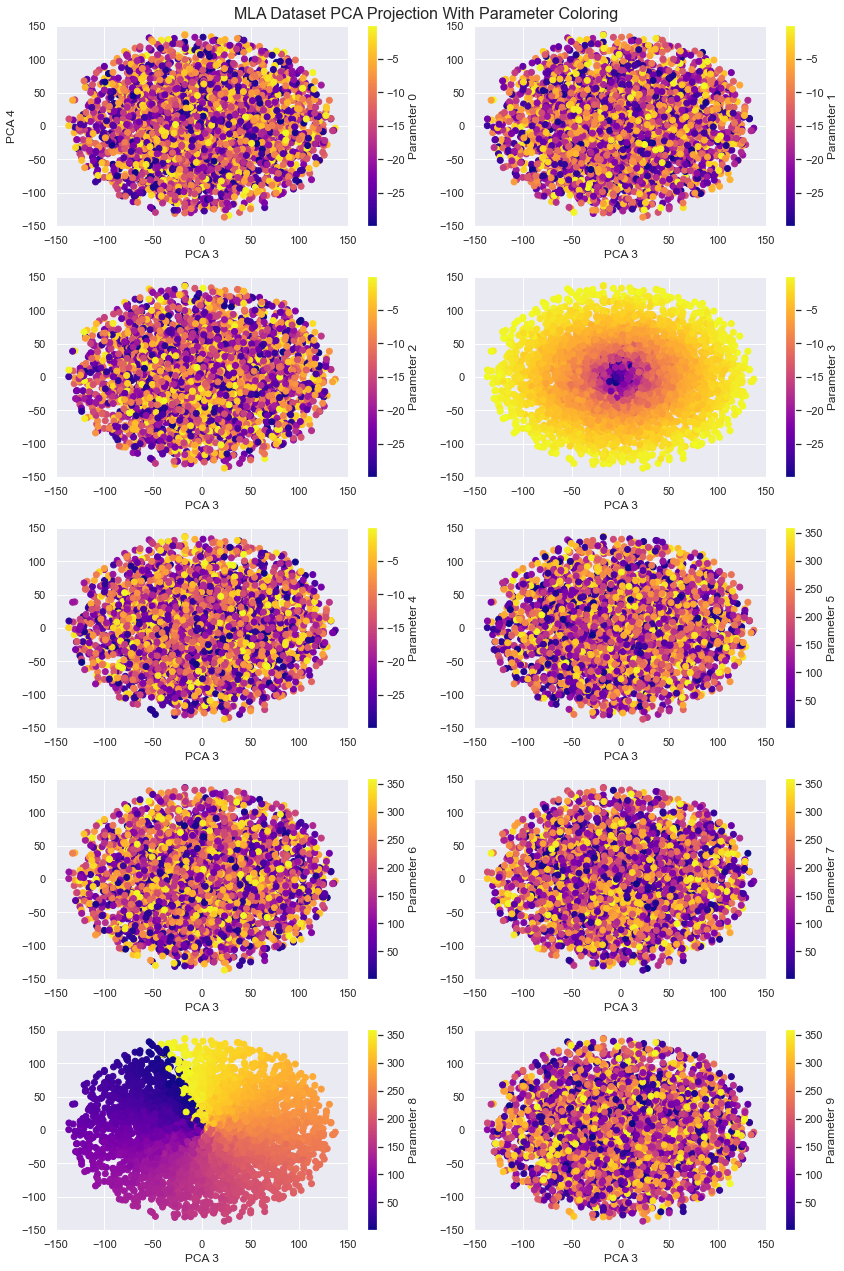

In [19]:
from matplotlib import pyplot as plt
from torch.utils.data.dataloader import DataLoader
import sklearn
import seaborn as sns
sns.set_theme()

def CustomPCAPlotMLA(dataset,param_names = None,pca_components = (1,2),figsize = (12,18),title = None, layout_shape = ()):

    

    pca_components = [x-1 for x in pca_components] # Switch to zero-index
    num_samples = len(dataset)
    
    dataloader = DataLoader(dataset,batch_size=num_samples)
    params, fields  = next(iter(dataloader))
    num_params = len(params.T)


    pca = sklearn.decomposition.PCA(n_components = max(pca_components)+1)

    projection = pca.fit_transform(fields.reshape(num_samples,-1))[:,list(pca_components)]


    if param_names is None:
        param_names = ['Parameter '+str(x) for x in range(0,num_params)]
    
    fig, axs = plt.subplots(nrows = 5, ncols =  2,figsize = figsize,tight_layout = True)

    
    if type(title) == type(None):
        fig.suptitle(dataset.name +' PCA Projection With Parameter Coloring', fontsize = 16)
    else:
        fig.suptitle(title, fontsize = 16)

    axs = axs.flatten() # Ensure flat axis array
    axs[0].set_ylabel('PCA '+str(pca_components[1]+1))
    for i in range(num_params):
        im = axs[i].scatter(projection[:,0],projection[:,1],c = params[:,i],cmap = 'plasma')
        axs[i].set_xlabel('PCA '+str(pca_components[0]+1))
        
        cbar = plt.colorbar(im,ax=axs[i])
        cbar.set_label(param_names[i])    


CustomPCAPlotMLA(dataset,pca_components=(3,4),title= 'MLA Dataset PCA Projection With Parameter Coloring')

C:\Users\Niels\AppData\Local\Temp/ipykernel_30148/3351324384.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[0,0])
C:\Users\Niels\AppData\Local\Temp/ipykernel_30148/3351324384.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[0,1])
C:\Users\Niels\AppData\Local\Temp/ipykernel_30148/3351324384.py:50: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[row,0])
C:\Users\Niels\AppData\Local\Temp/ipykernel_30148/3351324384.py:59: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() an

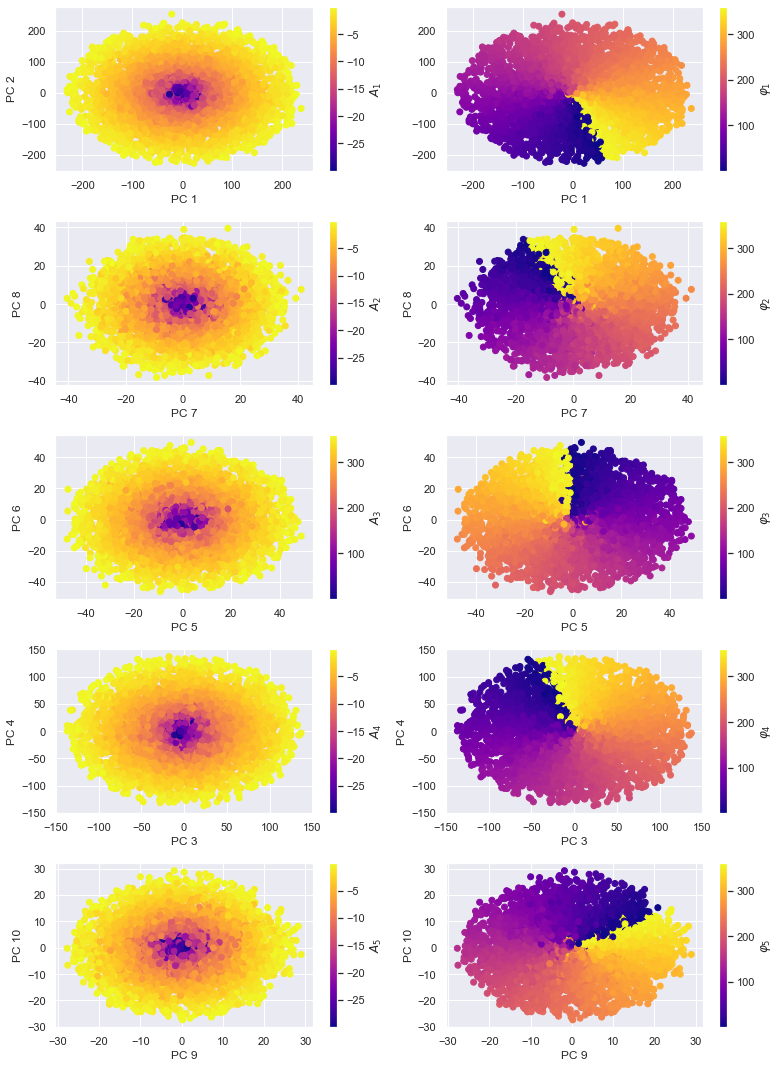

In [20]:
def MLAplotOnlyImportantLatents(dataset,param_names = None,pca_components = (1,2),figsize = (11,15),title = None, layout_shape = ()):

    pca_components = [x-1 for x in pca_components] # Switch to zero-index
    num_samples = len(dataset)
    
    dataloader = DataLoader(dataset,batch_size=num_samples)
    params, fields  = next(iter(dataloader))
    num_params = len(params.T)

    pca = sklearn.decomposition.PCA(n_components = 10)

    projection = pca.fit_transform(fields.reshape(num_samples,-1))

    fig, axs = plt.subplots(nrows = 5, ncols =  2,figsize = figsize,tight_layout = True)

    param_names = ['$A_1$',r'$\varphi_1$','$A_2$',r'$\varphi_2$','$A_3$',r'$\varphi_3$','$A_4$',r'$\varphi_4$','$A_5$',r'$\varphi_5$']
    
    # Find parameter indices of important latents

    amplitude = [0,1,2,3,4]
    phases = [5,6,7,8,9]

    title = 'Select MLA PCA Components'

    axs = axs# Ensure flat axis array
    axs[0,0].set_ylabel('PC '+str(pca_components[1]+1))
   
    im = axs[0,0].scatter(projection[:,0],projection[:,1],c = params[:,0],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[0,0])
    cbar.set_label(param_names[0])


    im = axs[0,1].scatter(projection[:,0],projection[:,1],c = params[:,5],cmap = 'plasma')

    axs[0,0].set_xlabel('PC '+str(pca_components[0]+1))
    axs[0,1].set_xlabel('PC '+str(pca_components[0]+1))
        
    

    cbar = plt.colorbar(im,ax=axs[0,1])
    cbar.set_label(param_names[1])

    # Second row
    row = 1
    pcax,pcay = 7,8
    axs[row,0].set_ylabel('PC '+str(pcay))
    axs[row,1].set_ylabel('PC '+str(pcay))
   
    im = axs[row,0].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,1],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[row,0])
    cbar.set_label(param_names[2])
    im = axs[row,1].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,6],cmap = 'plasma')

    axs[row,0].set_xlabel('PC '+str(pcax))
    axs[row,1].set_xlabel('PC '+str(pcax))
        
    

    cbar = plt.colorbar(im,ax=axs[row,1])
    cbar.set_label(param_names[3])

    # Third Row
    row = 2
    pcax,pcay = 5,6
    axs[row,0].set_ylabel('PC '+str(pcay))
    axs[row,1].set_ylabel('PC '+str(pcay))
   
    im = axs[row,0].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,2],cmap = 'plasma')
    im = axs[row,1].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,7],cmap = 'plasma')

    axs[row,0].set_xlabel('PC '+str(pcax))
    axs[row,1].set_xlabel('PC '+str(pcax))
        
    cbar = plt.colorbar(im,ax=axs[row,0])
    cbar.set_label(param_names[4])

    cbar = plt.colorbar(im,ax=axs[row,1])
    cbar.set_label(param_names[5])

    # Fourth row
    row = 3
    pcax,pcay = 3,4
    axs[row,0].set_ylabel('PC '+str(pcay))
    axs[row,1].set_ylabel('PC '+str(pcay))
   
    im = axs[row,0].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,3],cmap = 'plasma')

    cbar = plt.colorbar(im,ax=axs[row,0])
    cbar.set_label(param_names[6])

    im = axs[row,1].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,8],cmap = 'plasma')

    cbar = plt.colorbar(im,ax=axs[row,1])
    cbar.set_label(param_names[7])

    axs[row,0].set_xlabel('PC '+str(pcax))
    axs[row,1].set_xlabel('PC '+str(pcax))

    # Fourth row
    row = 4
    pcax,pcay = 9,10
    axs[row,0].set_ylabel('PC '+str(pcay))
    axs[row,1].set_ylabel('PC '+str(pcay))
    im = axs[row,0].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,4],cmap = 'plasma')

    cbar = plt.colorbar(im,ax=axs[row,0])
    cbar.set_label(param_names[8])

    im = axs[row,1].scatter(projection[:,pcax-1],projection[:,pcay-1],c = params[:,9],cmap = 'plasma')

    cbar = plt.colorbar(im,ax=axs[row,1])
    cbar.set_label(param_names[9])

    axs[row,0].set_xlabel('PC '+str(pcax))
    axs[row,1].set_xlabel('PC '+str(pcax))
        
    

    


MLAplotOnlyImportantLatents(dataset,title= 'MLA Dataset PCA Projection With Parameter Coloring')
figSaver('ImportantLatent_MLA_PCA_Projection_With_Parameter_Coloring')